In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

import import_ipynb
import popularity_metadata_options

importing Jupyter notebook from popularity_metadata_options.ipynb


### For main dataset 

In [2]:
df = pd.read_csv('./data/popularity/mean_merge.csv')
df = df.dropna()

In [3]:
df.head(2)

,full_text_x,Emotional_disclosure,Information_disclosure,score_x,emo_disc.1,emo_disc.2,emo_disc.3,emo_disc.4,info_disc.1,info_disc.2,...,Throughput.2_y,Throughput.3_y,Throughput.4_y,WorkTime.1_y,WorkTime.2_y,WorkTime.3_y,WorkTime.4_y,popularity_y,num_words,num_chars
0,'' Alot of people DONT think like that when t...,0,0,2,True,True,True,False,False,True,...,650,561,92,10,11,7,19,0,12,57
1,'Official' would be one way to describe it.,1,0,2,False,False,False,True,True,True,...,215,1950,3272,10,43,11,41,0,8,43


TP1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
WT1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL1: weighted by 1 normalised number of characters per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP1: weighted by average of TP1 and TP2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


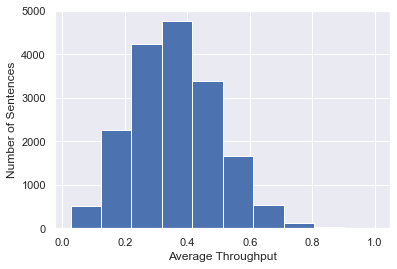

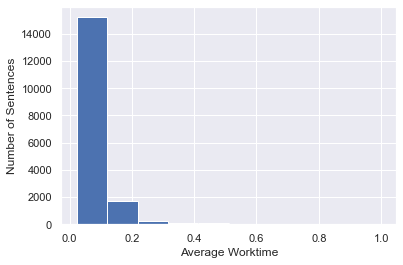

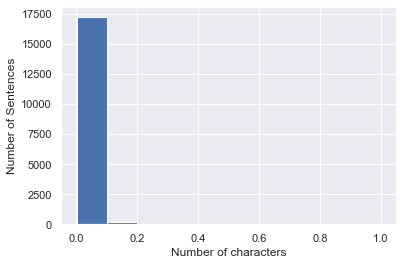

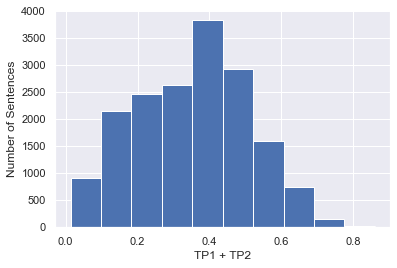

In [4]:
throughput_option = 'TP1'
worktime_option = 'WT1'
pc_agreement_option = 'PC1'
textlength_option = 'TL1'
special_option = 'SP1'
k_option_for_tp = 1
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_avg, df_worktime_avg, df_textlength_avg, df_special_1 = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_avg['avg_throughput'].hist()
plt.xlabel('Average Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_avg.png')

plt.figure()
hist = df_worktime_avg['avg_worktime'].hist()
plt.xlabel('Average Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_worktime_avg.png')

plt.figure()
hist = df_textlength_avg['num_chars'].hist()
plt.xlabel('Number of characters')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_textlength_numchars.png')

# plt.figure()
# hist = df_agreement_avg['avg_agreement'].hist()
# plt.xlabel('Average Agreement')
# plt.ylabel('Number of Sentences')
# plt.savefig('./output/main_agreement_avg.png')

plt.figure()
hist = df_special_1['average_avg_var'].hist()
plt.xlabel('TP1 + TP2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_1.png')

In [5]:
df_throughput_avg.head(2)

,Throughput.1_x,Throughput.2_x,Throughput.3_x,Throughput.4_x,Throughput.1_y,Throughput.2_y,Throughput.3_y,Throughput.4_y,avg_throughput
0,512,845,40,305,1130,650,561,92,0.180284
1,2,196,15,2261,1072,215,1950,3272,0.391655


TP2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


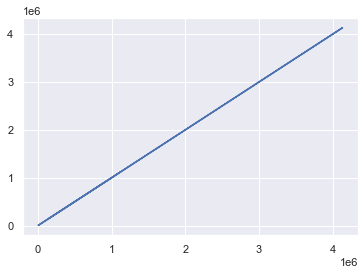

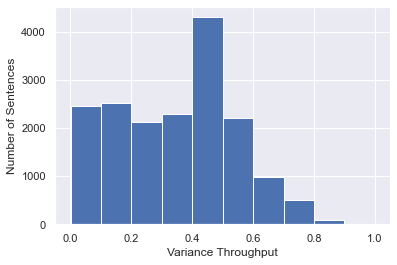

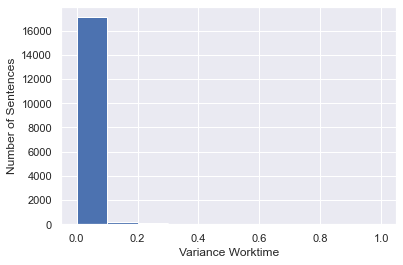

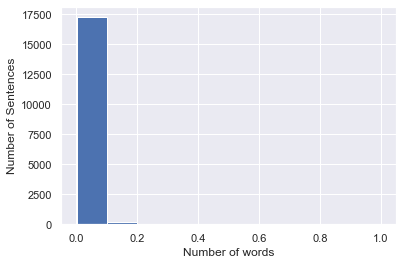

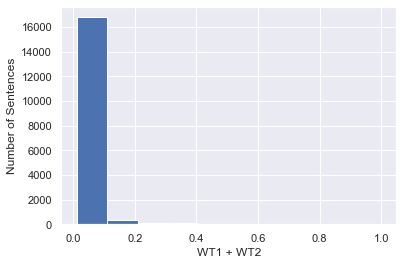

In [6]:
throughput_option = 'TP2'
worktime_option = 'WT2'
pc_agreement_option = 'PC2'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, textlength_option, special_option, k_option_for_tp]

df_throughput_var, df_worktime_var, df_textlength_var, df_special_var = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_var['var_throughput'].hist()
plt.xlabel('Variance Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_var.png')

plt.figure()
hist = df_worktime_var['var_worktime'].hist()
plt.xlabel('Variance Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_worktime_var.png')

plt.figure()
hist = df_textlength_var['num_words'].hist()
plt.xlabel('Number of words')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_textlength_words.png')

# plt.figure()
# hist = df_agreement_var['var_agreement'].hist()
# plt.xlabel('Variance Agreement')
# plt.ylabel('Number of Sentences')
# plt.savefig('./output/main_agreement_var.png')

plt.figure()
hist = df_special_var['average_avg_var'].hist()
plt.xlabel('WT1 + WT2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_2.png')

TP3 + k: weighted by 1 inverted k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


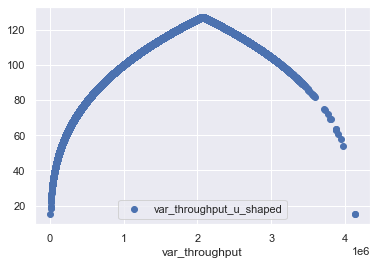

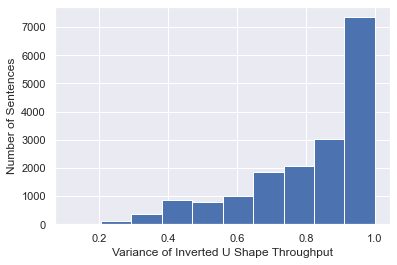

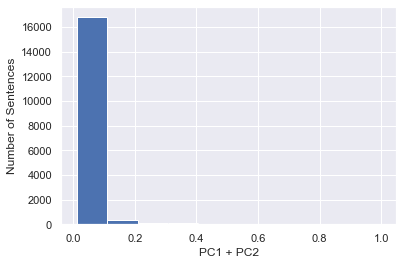

In [7]:
throughput_option = 'TP3'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_inv_u, _, _, df_special_4 = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_inv_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Inverted U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_u_var.png')

plt.figure()
hist = df_special_4['average_avg_var'].hist()
plt.xlabel('PC1 + PC2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_3.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
# RAND_NORM: weighted by 1 normally distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


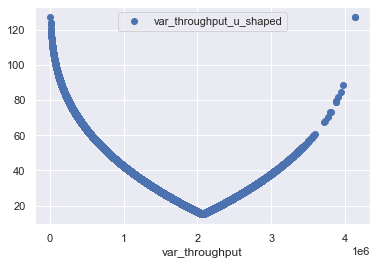

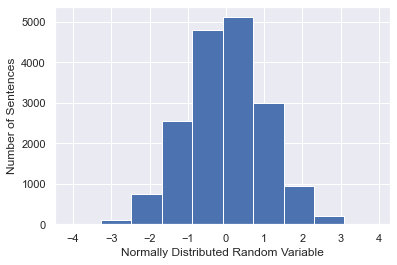

In [8]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_NORM'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

_, _, _, df_special_norm = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_special_norm['special_norm'].hist()
plt.xlabel('Normally Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_5.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
RAND_UNI: weighted by 1 uniformly distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


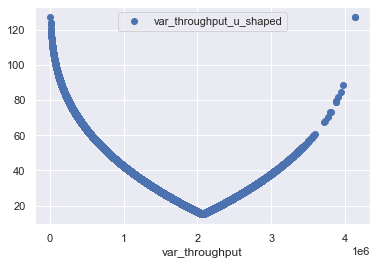

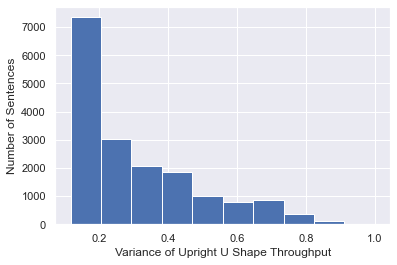

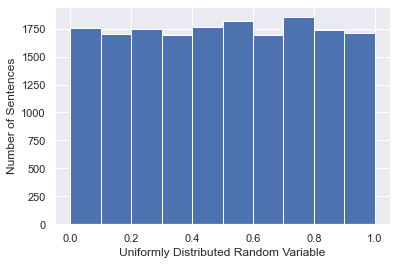

In [9]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_UNI'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_upright_u, _, _, df_special_uni = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_upright_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Upright U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special_uni['special_uni'].hist()
plt.xlabel('Uniformly Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_4.png')

### Correlation Plots

In [10]:
df_merge = pd.merge(df, df_throughput_avg['avg_throughput'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_avg['avg_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_avg['num_chars'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_1['average_avg_var'], left_index=True, right_index=True)
#df_merge = pd.merge(df_merge, df_agreement_avg['avg_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_var['var_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_var['num_words'], left_index=True, right_index=True)
#df_merge = pd.merge(df_merge, df_agreement_var['var_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_var['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_inv_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_4['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_upright_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_uni['special_uni'], left_index=True, right_index=True)

In [11]:
df_merge.head()

,full_text_x,Emotional_disclosure,Information_disclosure,score_x,emo_disc.1,emo_disc.2,emo_disc.3,emo_disc.4,info_disc.1,info_disc.2,...,avg_worktime,num_chars_y,average_avg_var_x,var_worktime,num_words_y,average_avg_var_y,var_throughput_u_shaped_x,average_avg_var,var_throughput_u_shaped_y,special_uni
0,'' Alot of people DONT think like that when t...,0,0,2,True,True,True,False,False,True,...,0.037495,0.022947,0.108786,0.000220,0.024948,0.018882,0.404177,0.018882,0.713436,0.238786
1,'Official' would be one way to describe it.,1,0,2,False,False,False,True,True,True,...,0.116127,0.017311,0.381548,0.002708,0.016632,0.059644,0.905971,0.059644,0.211643,0.664003
2,"""...you mix me a cocktail.""",0,0,2,True,True,True,False,False,True,...,0.477248,0.010870,0.560586,0.375058,0.010395,0.426579,0.942452,0.426579,0.175161,0.634059
3,"""Be kind, for everyone you meet is fighting a ...",0,0,3,True,True,True,False,True,True,...,0.073535,0.030998,0.361700,0.001063,0.029106,0.037390,0.780537,0.037390,0.337076,0.587373
4,"""Consider yourself lucky because I chose you""?",0,0,1,True,True,True,True,True,True,...,0.085184,0.018519,0.392237,0.001169,0.014553,0.043302,0.950100,0.043302,0.167513,0.333319


In [12]:
df_combined = pd.concat([df_throughput_avg['avg_throughput'], df_worktime_avg['avg_worktime'], df_textlength_avg['num_chars'], df_special_1['average_avg_var'], df_throughput_var['var_throughput'], df_worktime_var['var_worktime'], df_textlength_var['num_words'], df_special_var['average_avg_var'], df_throughput_inv_u['var_throughput_u_shaped'], df_special_4['average_avg_var'], df_special_norm['special_norm'], df_throughput_upright_u['var_throughput_u_shaped'], df_special_uni['special_uni']],axis=1)

In [13]:
df_merge.to_csv('./output/pop_metadata_features.csv', index=False)

In [14]:
corr_matrix = df_combined.corr()
corr_matrix.to_csv('./output/pop_correlation_matrix.csv', index=False)

<AxesSubplot:>

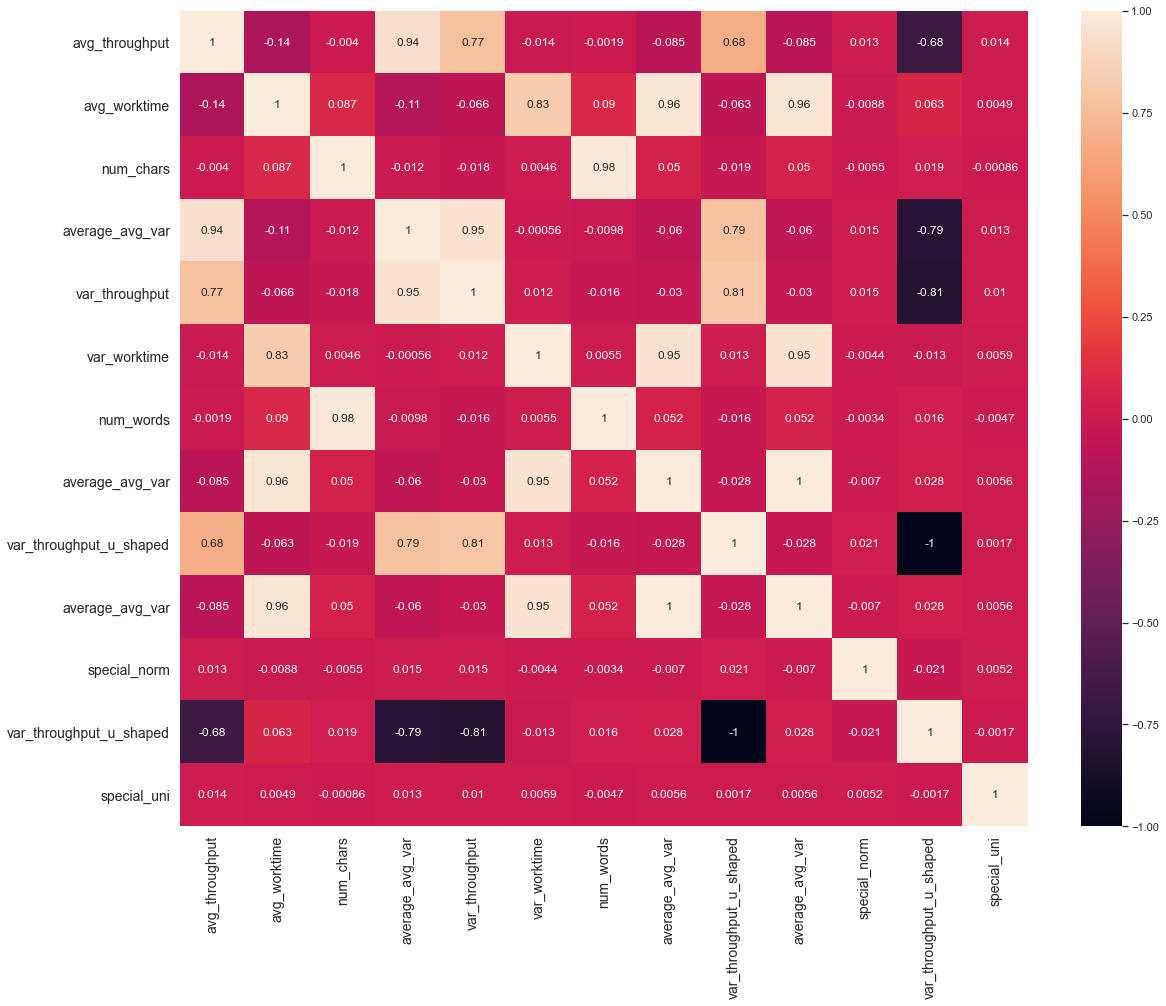

In [15]:
f = plt.figure(figsize=(19, 15))
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
sb.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)